In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib import animation

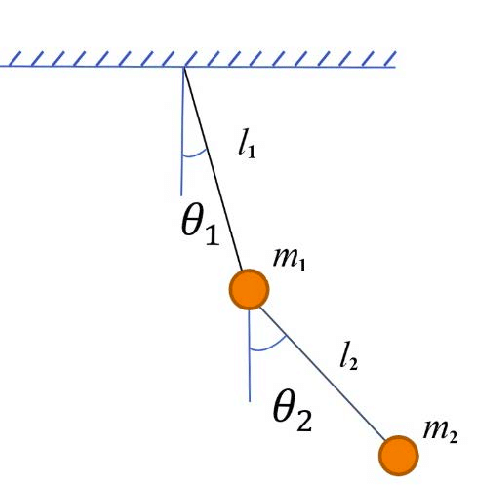

In [70]:
t,g = smp.symbols('t g')
m1,m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1 L2')

$\theta_1$ and $\theta_2$ are the generalised coordinates to define the kinematics and dynamics of our system. Since they are the STATE VARIABLES, they must be defined as follows to make them time dependant:

In [71]:
the1, the2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)

Explicitly write them as functions of time $t$:

In [72]:
the1 = the1(t)
the2 = the2(t)

Find the derivatives: $\dot\theta_1$, $\dot\theta_2$, $\ddot\theta_1$, $\ddot\theta_2$

In [73]:
the1_d = smp.diff(the1, t)
the1_dd = smp.diff(the1_d, t)
the2_d = smp.diff(the2, t)
the2_dd = smp.diff(the2_d, t)

Express kinetic and potential energy in terms of the generalised coordinates

In [74]:
# Kinetic energy: 1/2 M * V * V
T1 = 1/2* m1 *(smp.diff(L1*smp.sin(the1),t)**2 + smp.diff(L1*smp.cos(the1),t)**2)
T2 = 1/2* m2 *(smp.diff(L2*smp.sin(the2),t)**2 + (smp.diff(L2*smp.cos(the2),t))**2)

# Potential energy: m*g*h
V1 = m1* g * L1*smp.cos(the1)
V2 = m2* g * L2*smp.cos(the2)

L = T1 + T2 - V1 - V2

Get Lagrnage's Equations: $$ \frac{\partial L}{\partial \theta_1} - \frac{d}{dt}\frac{\partial L}{\partial \dot\theta_1} = 0   $$
$$ \frac{\partial L}{\partial \theta_2} - \frac{d}{dt}\frac{\partial L}{\partial \dot\theta_2} = 0   $$

In [75]:
LE1 = smp.diff(L,the1) - smp.diff(smp.diff(L,the1_d),t).simplify()
LE2 = smp.diff(L,the2) - smp.diff(smp.diff(L,the2_d),t).simplify()

In [76]:
sols = smp.solve([LE1,LE2],(the1_dd,the2_dd), simlpify=False, rational=False)

With the solution for the equations of motion of the system, undo the symbolic expression and perform integration. We now have an equation dependant on $\dot\theta$ and other parameters, we have indeed two equations (symilar to state space representation). In this case we will assume $z_1 = \dot\theta_1$.

In [77]:
dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the1_d,the2,the2_d),sols[the1_dd])
dthe1dt_f = smp.lambdify(the1_d,the1_d)
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the1_d,the2,the2_d),sols[the2_dd])
dthe2dt_f = smp.lambdify(the2_d,the2_d)

Define a functions to solve for the system of ODEs

In [78]:
def dSdt(S,t,g,m1,m2,L1,L2):
    the1, z1, the2, z2 = S
    return [dthe1dt_f(z1), dz1dt_f(t,g,m1,m2,L1,L2,the1,z1,the2,z2), dthe2dt_f(z2), dz2dt_f(t,g,m1,m2,L1,L2,the1,z1,the2,z2)]

In [79]:
t = np.linspace(0,5,25*5)
g = 9.81
m1 = 2
m2 = 1
L1 = 1
L2 = 0.5
ans = odeint(dSdt, y0 =[1,-3,0,0], t=t, args=(g,m1,m2,L1,L2))

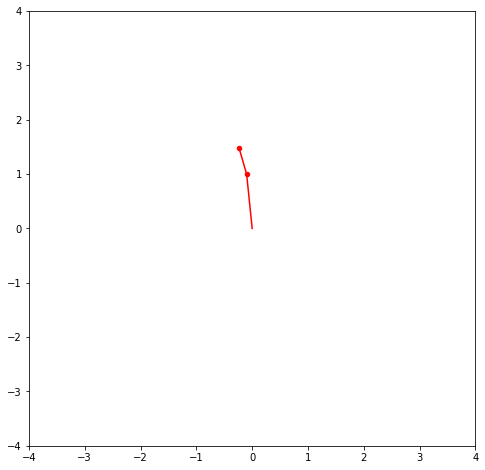

In [80]:
x1 = L1*np.sin(ans[:,0])
y1 = L1*np.cos(ans[:,0])
x2, y2 = L1*np.sin(ans[:,0])+L2*np.sin(ans[:,1]), L1*np.cos(ans[:,0])+L2*np.cos(ans[:,1])
fig, ax = plt.subplots(1,1,figsize=(8,8))
def update(i):
# clear the axis each frame
    ax.clear()
    # replot things
    ax.scatter([x1[i],x2[i]], [y1[i],y2[i]],s = 20, c = 'r')
    ax.plot([0,x1[i],x2[i]],[0,y1[i],y2[i]],c= 'r')
    lim = 4
    ax.set_xlim((-lim, lim))
    ax.set_ylim((-lim, lim))

ani = animation.FuncAnimation(fig, update, frames=25*5, interval=1)
ani.save('Double_pendulum.gif',writer='pillow',fps=25)
